In [1]:
from random import randint

import pyqtgraph as pg
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtCore import Qt
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
from matplotlib import pyplot as plt
from Agents.Boid import Boid
from Agents.Mountain import Mountain
from Agents.Predator import Predator
from tqdm import tqdm

In [2]:
time = 100
size = 400

In [3]:
def cohesion(num):
    boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(150)]
    mountains = [Mountain(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(20)]
    predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(4)]
    cohesion = []
    for t in tqdm(range(time)):
        tot = 0
        cohesion_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            boid_cohesion = boid.cohension(boids)
            if boid_cohesion > 0:
                tot += boid_cohesion
                cohesion_num += 1
        tot /= len(boids)
        cohesion.append(tot)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return cohesion

def alignment(num):
    boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(150)]
    mountains = [Mountain(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(20)]
    predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(4)]
    alignment = []
    for t in tqdm(range(time)):
        tot = 0
        alignment_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            boid_alignment = boid.alignment(boids)
            if boid_alignment > 0:
                tot += boid_alignment
                alignment_num += 1
        tot /= len(boids)
        alignment.append(tot)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return alignment

alignment_raw = alignment(0)
alignment_all = alignment(1)
alignment_pred = alignment(2)
alignment_mountain = alignment(3)

cohesion_raw = cohesion(0)
cohesion_all = cohesion(1)
cohesion_pred = cohesion(2)
cohesion_mountain = cohesion(3)

# cohesionWithoutVisual_raw = cohesionWithoutVisual(0)
# cohesionWithoutVisual_all = cohesionWithoutVisual(1)
# cohesionWithoutVisual_pred = cohesionWithoutVisual(2)
# cohesionWithoutVisual_mountain = cohesionWithoutVisual(3)

100%|██████████| 100/100 [00:04<00:00, 23.85it/s]


In [4]:
max_cohesion, min_cohesion = max(cohesion_raw), min(cohesion_raw)
max_alignment, min_alignment = max(alignment_raw), min(alignment_raw)
cohesion_raw = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw]
cohesion_mountain = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain]
cohesion_pred = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred]
cohesion_all = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all]
alignment_raw = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw]
alignment_mountain = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain]
alignment_pred = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred]
alignment_all = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all]



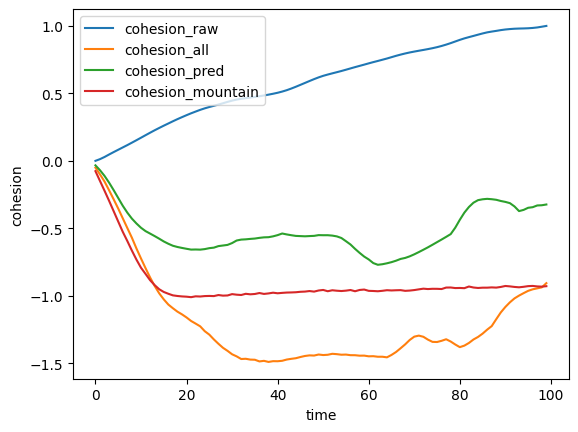

In [5]:
plt.plot(list(range(time)), cohesion_raw, label="cohesion_raw")
plt.plot(list(range(time)), cohesion_all, label="cohesion_all")
plt.plot(list(range(time)), cohesion_pred, label="cohesion_pred")
plt.plot(list(range(time)), cohesion_mountain, label="cohesion_mountain")
plt.xlabel("time")
plt.ylabel("cohesion")
plt.legend()
plt.show()

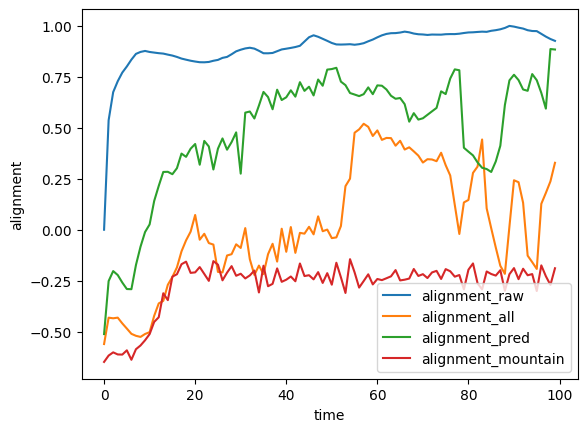

In [6]:
plt.plot(list(range(time)), alignment_raw, label="alignment_raw")
plt.plot(list(range(time)), alignment_all, label="alignment_all")
plt.plot(list(range(time)), alignment_pred, label="alignment_pred")
plt.plot(list(range(time)), alignment_mountain, label="alignment_mountain")
plt.xlabel("time")
plt.ylabel("alignment")
plt.legend()
plt.show()

In [7]:
def centeringPosition(num):
    boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(150)]
    mountains = [Mountain(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(20)]
    predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(4)]
    ceneteringPosX = []
    ceneteringPosY = []
    for t in tqdm(range(time)):
        tot = 0
        alignment_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            X, Y = boid.centerPosition(boids)
            ceneteringPosX.append(X)
            ceneteringPosY.append(Y)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return ceneteringPosX, ceneteringPosY


In [8]:
ceneteringPosX_raw, ceneteringPosY_raw = centeringPosition(0)
ceneteringPosX_all, ceneteringPosY_all = centeringPosition(1)
ceneteringPosX_pred, ceneteringPosY_pred = centeringPosition(2)
ceneteringPosX_mountain, ceneteringPosY_mountain = centeringPosition(3)


100%|██████████| 100/100 [00:04<00:00, 23.64it/s]


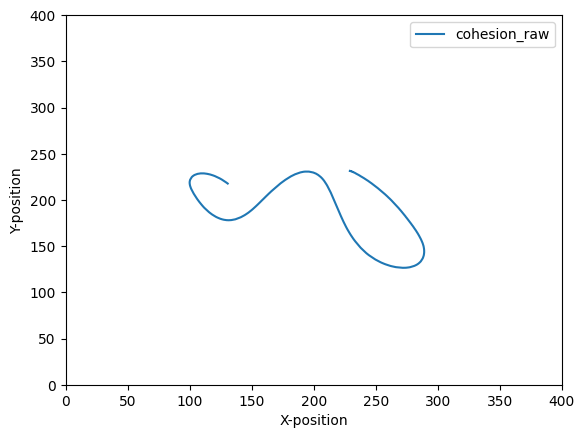

In [23]:
plt.plot(ceneteringPosX_raw, ceneteringPosY_raw, label="cohesion_raw")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.xlim(0, size)
plt.ylim(0, size)
plt.legend()

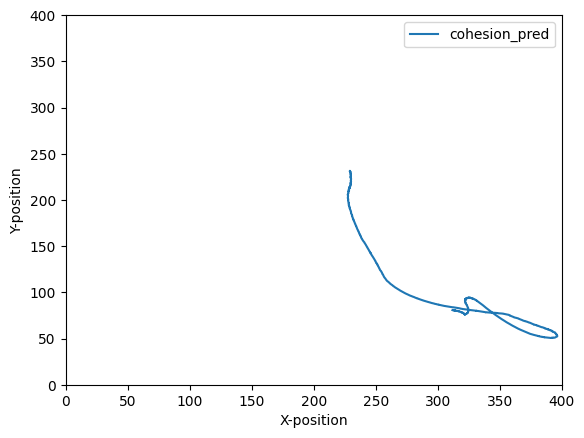

In [22]:
plt.plot(ceneteringPosX_pred, ceneteringPosY_pred, label="cohesion_pred")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.xlim(0, size)
plt.ylim(0, size)
plt.legend()

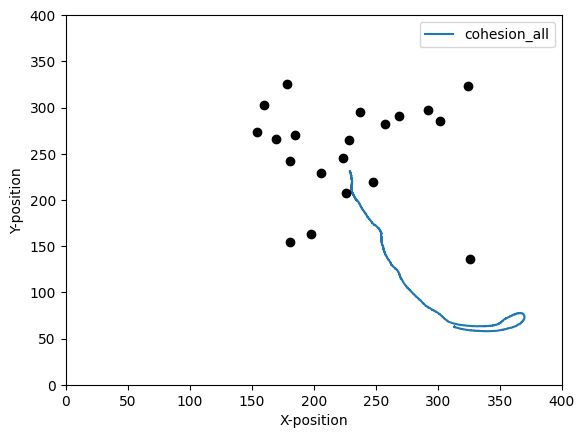

In [20]:
plt.plot(ceneteringPosX_all, ceneteringPosY_all, label="cohesion_all")
mountains = [Mountain(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(20)]
plt.plot([mountain.x for mountain in mountains], [mountain.y for mountain in mountains], 'o', color='black')
plt.xlim(0, size)
plt.ylim(0, size)
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.legend()

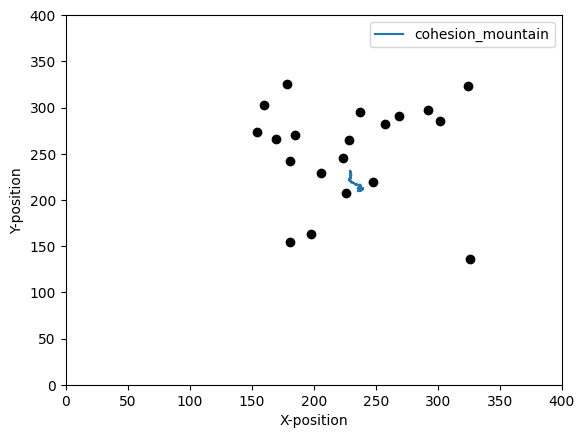

In [21]:

plt.plot(ceneteringPosX_mountain, ceneteringPosY_mountain, label="cohesion_mountain")
mountains = [Mountain(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2, seed=i) for i in range(20)]
plt.plot([mountain.x for mountain in mountains], [mountain.y for mountain in mountains], 'o', color='black')
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.xlim(0, size)
plt.ylim(0, size)
plt.legend()

In [18]:
print([mountain.x for mountain in mountains])

[302.217703638343, 160.2061821558136, 324.5401877111832, 180.9262587517116, 180.54295128082026, 257.91367231127373, 292.00135008566593, 198.09988629996582, 178.6745052095431, 225.93480489633765, 247.61385227131603, 223.80924403529707, 228.24746907104296, 185.13503167642807, 154.69904087366447, 326.38176164375795, 205.63788831614838, 237.73011527583196, 169.5863059999776, 268.7584986933874]
